In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from google.colab.patches import cv2_imshow
from natsort import natsorted
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import scipy.signal
import sys

In [3]:
# dataset folder
root = '/content/drive/MyDrive/UBFC_DATASET/DATASET_2/'

# 폴더 목록 가져오기
dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
# 모든 폴더에 대해 반복
for dir_name in dirs:
    vid_folder = os.path.join(root, dir_name)

    # load ground truth
    gt_filename = os.path.join(vid_folder, 'ground_truth.txt')
    if os.path.exists(gt_filename):
        gt_data = np.loadtxt(gt_filename)
        gt_trace = gt_data[0, :]
        gt_time = gt_data[2, :] / 1000
        gt_hr = gt_data[1, :]
    else:
        gt_filename = os.path.join(vid_folder, 'gtdump.xmp')
        if os.path.exists(gt_filename):
            gt_data = np.loadtxt(gt_filename)
            gt_trace = gt_data[:, 3]
            gt_time = gt_data[:, 0] / 1000
            gt_hr = gt_data[:, 1]

    # normalize data (zero mean and unit variance)
    gt_trace = (gt_trace - np.mean(gt_trace)) / np.std(gt_trace)

    # open video file
    vid_obj = cv2.VideoCapture(os.path.join(vid_folder, 'vid.avi'))
    fps = vid_obj.get(cv2.CAP_PROP_FPS)

    n = 0
    bpm_sum = 0  # 비디오당 총 심박수 합계 초기화
    while vid_obj.isOpened():
        # track frame index
        ret, img = vid_obj.read()
        if not ret:
            break
        n += 1

        # perform operations on frame
        # cv2_imshow(img)


        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    vid_obj.release()
    cv2.destroyAllWindows()

Average Heart Rate: 109.80887351778657 BPM
[0.85641211 0.59557331 0.36733935 ... 2.2013622  1.541114   1.541114  ]
Time:  [0.0000e+00 4.1000e-05 5.3000e-05 ... 6.7679e-02 6.7716e-02 6.7716e-02]
[ 98.   98.   98.  ... 108.5 109.  109. ]


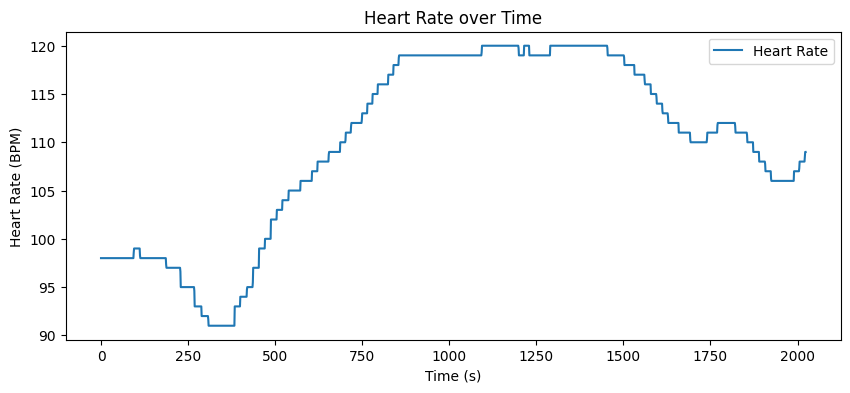

In [ ]:
# dataset folder
root = '/content/drive/MyDrive/UBFC_DATASET/DATASET_2/'

# 폴더 목록 가져오기
dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
# 모든 폴더에 대해 반복

vid_folder = os.path.join(root, dir_name)

# load ground truth
gt_filename = os.path.join('/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject10/', 'ground_truth.txt')
if os.path.exists(gt_filename):
  # 공백 또는 탭으로 구분된 파일로 가정
  gt_data = np.loadtxt(gt_filename)
  gt_trace = gt_data[0, :].T
  gt_time = gt_data[2, :].T / 1000  # 밀리초를 초로 변환
  gt_hr = gt_data[1, :].T

print(gt_trace)
print('Time: ',gt_time)
print(gt_hr)
# 심박수 시각화
plt.figure(figsize=(10, 4))
plt.plot(gt_hr, label='Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate over Time')
plt.legend()
plt.show()
# normalize data (zero mean and unit variance)
gt_trace = (gt_trace - np.mean(gt_trace)) / np.std(gt_trace)

In [ ]:
def pulse_convert(current_path, tempPathNofile):
    f = open(current_path, 'r')
    lines = f.readlines()
    lines.pop(1)
    lines.pop(1)
    f.close()

    string_label = lines[0]
    bvp_label = string_label.split()
    for i, data in enumerate(bvp_label):
        bvp_label[i] = float(data)*100

    # save bvp_label as *.csv
    newDF = pd.DataFrame(bvp_label)
    newDF.to_csv(tempPathNofile, index=False, header=False)

base_path = "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/"
output_base_path = '/content/drive/MyDrive/everglow/ubfc-rppg/'
subjects = [f"subject{i}" for i in range(1, 50)]

for subject in subjects:
    current_path = os.path.join(base_path, subject, "ground_truth.txt")
    output_path = os.path.join(output_base_path, subject)
    os.makedirs(output_path, exist_ok=True)
    tempPathNofile = os.path.join(output_path, "ground_truth_converted.csv")

    # 파일이 존재하는지 확인
    if os.path.exists(current_path):
        pulse_convert(current_path, tempPathNofile)
        print(f"Processed {subject}")
    else:
        print(f"File not found for {subject}")


Processed subject1
File not found for subject2
Processed subject3
Processed subject4
Processed subject5
File not found for subject6
File not found for subject7
Processed subject8
Processed subject9
Processed subject10
Processed subject11
Processed subject12
Processed subject13
Processed subject14
Processed subject15
Processed subject16
Processed subject17
Processed subject18
File not found for subject19
Processed subject20
File not found for subject21
Processed subject22
Processed subject23
Processed subject24
Processed subject25
Processed subject26
Processed subject27
File not found for subject28
File not found for subject29
Processed subject30
Processed subject31
Processed subject32
Processed subject33
Processed subject34
Processed subject35
Processed subject36
Processed subject37
Processed subject38
Processed subject39
Processed subject40
Processed subject41
Processed subject42
Processed subject43
Processed subject44
Processed subject45
Processed subject46
Processed subject47
Proces

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 954.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 927.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 874.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 885.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 967.9 kB/s eta 0:00:00
     ━━━━━━━

## Make dataset

랜드마크를 통해 비디오를 자르고 3D-CNN의 64x64픽셀

In [ ]:
sys.path.append('/content/drive/MyDrive/everglow')

import utils # utils 모듈이 현재 디렉토리 또는 PYTHONPATH 상에 있어야 함

# 알파벳 순서로 정렬해서 반환
def ls(x='.'):
    return sorted(os.listdir(x))

def join(*x):
    return os.path.join(*x)

def main(input_root, output_root):
    if not os.path.isdir(output_root):
        os.makedirs(output_root)

    sessions = ls(input_root)

    for session in sessions:
        video_path = join(input_root, session, 'vid.avi')
        output_path = join(output_root, f'{session}.npz')
        gt_path = join(input_root, session, f'ground_truth.txt')
        # 맥박 데이터 load
        # 맥박 신호(wave), 심박수(HR), 시간 정보(wave_t)
        wave, HR, wave_t = np.loadtxt(gt_path)
        lmrks = utils.mediapipe_landmark_video(video_path)
        output_video, successful = utils.make_video_array(video_path, lmrks) # 얼굴 랜드마크 탐지
        if successful:
            print('video shape: ', output_video.shape)
            # 얼굴 랜드마크 특징점
            print('lmrks shape: ', lmrks.shape)
            # 맥박 신호
            print('waves shape: ', wave.shape)
            print(output_path)
            #
            np.savez_compressed(output_path, video=output_video, wave=wave, video_path=video_path, fps=30)

# 직접 경로 설정
input_root = '/content/drive/MyDrive/UBFC_DATASET/DATASET_2' # UBFC-rPPG 데이터셋의 원본 경로
output_root = '/content/drive/MyDrive/everglow/ubfc-rppg' # 전처리된 데이터셋이 저장될 경로

main(input_root, output_root)


video shape:  (1547, 64, 64, 3)
lmrks shape:  (1547, 68, 2)
waves shape:  (1547,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject1.npz
video shape:  (2024, 64, 64, 3)
lmrks shape:  (2024, 68, 2)
waves shape:  (2024,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject10.npz
video shape:  (2031, 64, 64, 3)
lmrks shape:  (2031, 68, 2)
waves shape:  (2031,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject11.npz
video shape:  (1989, 64, 64, 3)
lmrks shape:  (1989, 68, 2)
waves shape:  (1989,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject12.npz
video shape:  (2018, 64, 64, 3)
lmrks shape:  (2018, 68, 2)
waves shape:  (2018,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject13.npz
video shape:  (1993, 64, 64, 3)
lmrks shape:  (1993, 68, 2)
waves shape:  (1993,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject14.npz
video shape:  (2020, 64, 64, 3)
lmrks shape:  (2020, 68, 2)
waves shape:  (2020,)
/content/drive/MyDrive/everglow/ubfc-rppg/subject15.npz
video shape:  (2050, 64, 64, 3)
lmr

In [10]:
npz_file_path = '/content/drive/MyDrive/everglow/ubfc-rppg/subject1.npz'

data = np.load(npz_file_path)

keys = data.files
print("Keys in the npz file:", keys)

for key in keys:
    print(f"Shape of the data associated with key '{key}':", data[key].shape)

Keys in the npz file: ['video', 'wave', 'video_path', 'fps']
Shape of the data associated with key 'video': (1547, 64, 64, 3)
Shape of the data associated with key 'wave': (1547,)
Shape of the data associated with key 'video_path': ()
Shape of the data associated with key 'fps': ()


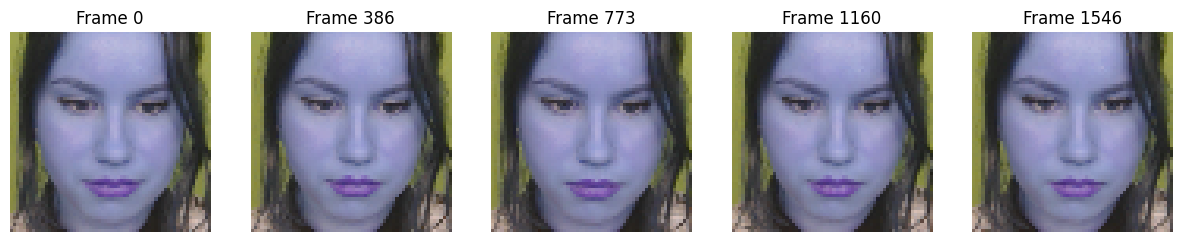

In [11]:
video = data['video']

num_frames, height, width, channels = video.shape

# 시각화할 프레임의 인덱스 선택
frame_indices = [0, num_frames // 4, num_frames // 2, 3 * num_frames // 4, num_frames - 1]

# 선택된 프레임 시각화
fig, axes = plt.subplots(1, len(frame_indices), figsize=(15, 5))
for ax, frame_idx in zip(axes, frame_indices):
    ax.imshow(video[frame_idx])
    ax.set_title(f'Frame {frame_idx}')
    ax.axis('off')
plt.show()

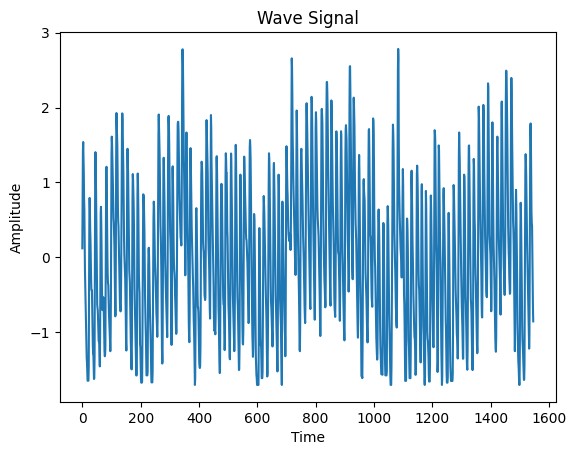

In [14]:
# 맥박 데이터 시각화
wave = data['wave']

plt.plot(wave)
plt.title('Wave Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Make metadata

In [ ]:

def main(input_root, output_path):
    subjects = natsorted(os.listdir(input_root))
    ids = []
    paths = []
    for subject in subjects:
        # 'subject' 문자열 뒤의 숫자(ID)를 추출합니다.
        subject_id = int(''.join(filter(str.isdigit, subject)))
        print(subject, subject_id)
        subject_path = os.path.join(input_root, subject)
        subject_path = os.path.abspath(subject_path)
        paths.append(subject_path)
        ids.append(subject_id)

    d = {}
    d['id'] = ids
    d['path'] = paths

    df = pd.DataFrame(d)
    df.to_csv(output_path, index=False)
    print(df)

# 입력 및 출력 경로 직접 설정
input_root = '/content/drive/MyDrive/everglow/ubfc-rppg'  # 여기에 실제 경로를 입력하세요.
output_path = '/content/drive/MyDrive/everglow/ubfc-rppg/metadata_csv_path.csv'  # 여기에 실제 경로를 입력하세요.

main(input_root, output_path)


subject1.npz 1
subject3.npz 3
subject4.npz 4
subject5.npz 5
subject8.npz 8
subject9.npz 9
subject10.npz 10
subject11.npz 11
subject12.npz 12
subject13.npz 13
subject14.npz 14
subject15.npz 15
subject16.npz 16
subject17.npz 17
subject18.npz 18
subject20.npz 20
subject22.npz 22
subject23.npz 23
subject24.npz 24
subject25.npz 25
subject26.npz 26
subject27.npz 27
subject30.npz 30
subject31.npz 31
subject32.npz 32
subject33.npz 33
subject34.npz 34
subject35.npz 35
subject36.npz 36
subject37.npz 37
subject38.npz 38
subject39.npz 39
subject40.npz 40
subject41.npz 41
subject42.npz 42
subject43.npz 43
subject44.npz 44
subject45.npz 45
subject46.npz 46
subject47.npz 47
subject48.npz 48
subject49.npz 49
    id                                               path
0    1  /content/drive/MyDrive/everglow/ubfc-rppg/subj...
1    3  /content/drive/MyDrive/everglow/ubfc-rppg/subj...
2    4  /content/drive/MyDrive/everglow/ubfc-rppg/subj...
3    5  /content/drive/MyDrive/everglow/ubfc-rppg/subj...
4    8  

In [4]:
df = pd.read_csv('/content/drive/MyDrive/everglow/ubfc-rppg/metadata_csv_path.csv')
df

,id,path
0,1,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
1,3,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
2,4,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
3,5,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
4,8,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
5,9,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
6,10,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
7,11,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
8,12,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
9,13,/content/drive/MyDrive/everglow/ubfc-rppg/subj...
